<a href="https://colab.research.google.com/github/ATHIRASARATH401/ict/blob/main/fish_csv.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd


data = pd.read_csv('/content/fish.csv')


print(data.head())


   Bream  242.0  23.2  25.4  30.0  38.4  13.4
0  Bream  290.0  24.0  26.3  31.2  40.0  13.8
1  Bream  340.0  23.9  26.5  31.1  39.8  15.1
2  Bream  363.0  26.3  29.0  33.5  38.0  13.3
3  Bream  430.0  26.5  29.0  34.0  36.6  15.1
4  Bream  450.0  26.8  29.7  34.7  39.2  14.2


In [3]:
data.describe()

,242.0,23.2,25.4,30.0,38.4,13.4
count,84.000000,84.000000,84.000000,84.000000,84.000000,84.000000
mean,434.017857,27.388095,29.607143,33.157143,27.953571,12.859524
std,382.648669,11.348058,12.249630,13.272086,10.351142,2.129377
min,0.000000,9.300000,9.800000,10.800000,14.500000,8.700000
25%,120.000000,19.325000,20.950000,23.550000,16.875000,10.875000
50%,390.000000,28.450000,30.850000,35.050000,26.900000,13.700000
75%,657.500000,32.725000,36.000000,40.675000,39.225000,14.700000
max,1650.000000,59.000000,63.400000,68.000000,44.500000,16.100000


In [4]:
data.columns


Index(['Bream', '242.0', '23.2', '25.4', '30.0', '38.4', '13.4'], dtype='object')

In [6]:
features = data[['13.4', '242.0']]


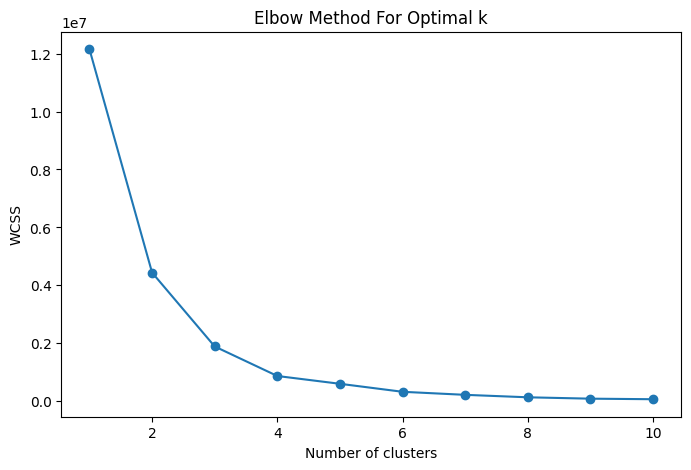

In [7]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Elbow method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(features)
    wcss.append(kmeans.inertia_)

# Plot the Elbow method
plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method For Optimal k')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()


In [8]:

optimal_clusters = 3
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
kmeans.fit(features)
data['KMeans_Cluster'] = kmeans.labels_


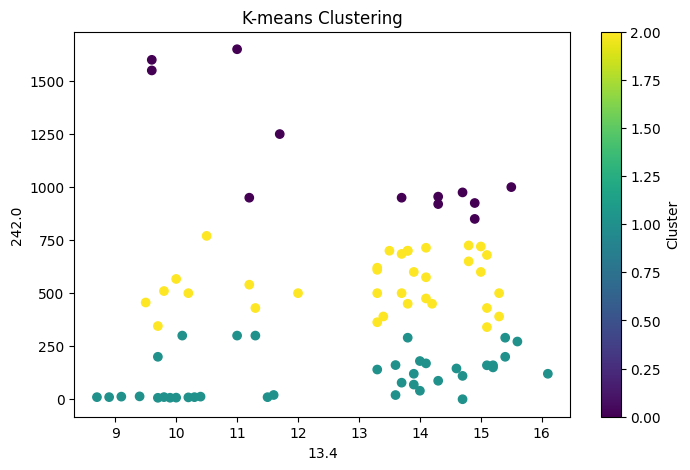

In [10]:
plt.figure(figsize=(8, 5))
plt.scatter(data['13.4'], data['242.0'], c=data['KMeans_Cluster'], cmap='viridis')
plt.title('K-means Clustering')
plt.xlabel('13.4')
plt.ylabel('242.0')
plt.colorbar(label='Cluster')
plt.show()


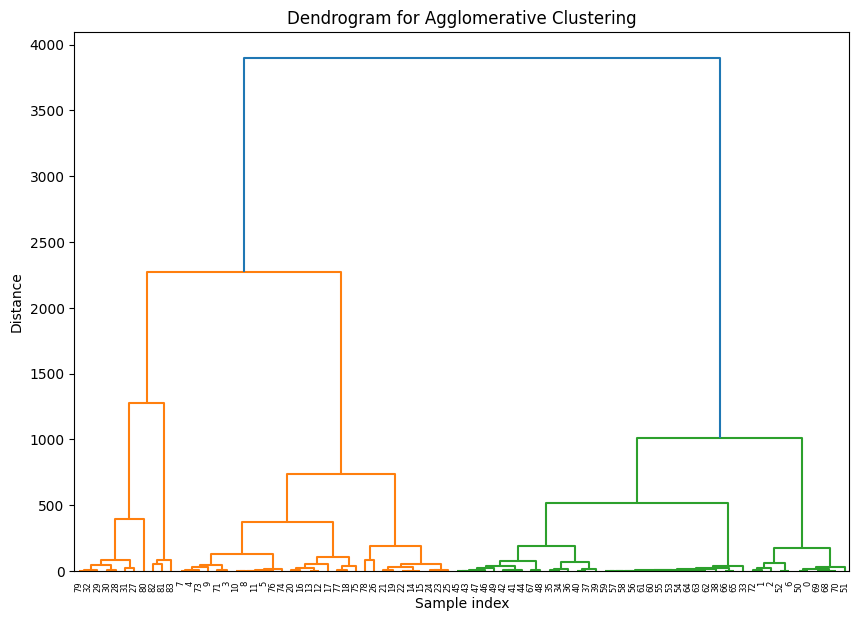

In [11]:
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage

# Create a dendrogram to visualize the hierarchical clustering
linked = linkage(features, method='ward')

plt.figure(figsize=(10, 7))
dendrogram(linked,
           orientation='top',
           distance_sort='descending',
           show_leaf_counts=True)
plt.title('Dendrogram for Agglomerative Clustering')
plt.xlabel('Sample index')
plt.ylabel('Distance')
plt.show()


In [12]:
# Agglomerative clustering
agglo = AgglomerativeClustering(n_clusters=3)
data['Agglo_Cluster'] = agglo.fit_predict(features)


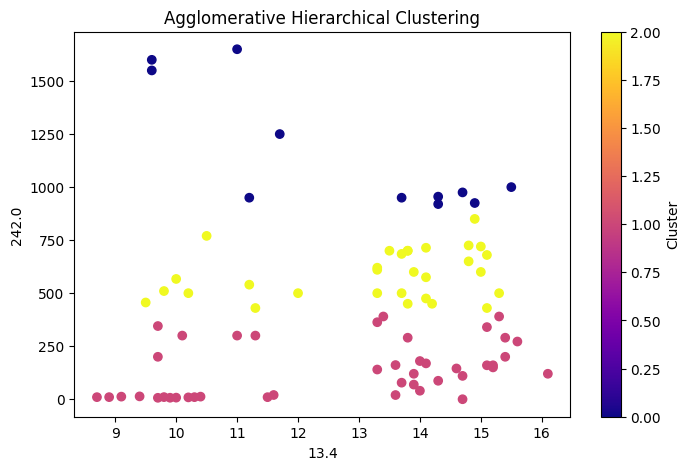

In [13]:
plt.figure(figsize=(8, 5))
plt.scatter(data['13.4'], data['242.0'], c=data['Agglo_Cluster'], cmap='plasma')
plt.title('Agglomerative Hierarchical Clustering')
plt.xlabel('13.4')
plt.ylabel('242.0')
plt.colorbar(label='Cluster')
plt.show()
